# Graded Challenge 2
Monica M. Pratiwi (FTDS016)

## Description

### Objective

Analisa sistem pembuangan dan pengelolaan sampah di Austin Smart City.

### Problem Statement

Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. 

## Working Area


Data Loading dari bigquery-public-data pada Google Cloud Big Query. Data diperoleh dari tabel "summary" yang terdapat di database 'bigquery-public-data.austin_waste.waste_and_diversion' dan perlu dilakukan proses *query* agar mendapatkan hasil yang sesuai. 

In [ ]:
select
a.report_date,
a.load_time,
a.load_type,
a.load_weight,
a.dropoff_site,
from `bigquery-public-data.austin_waste.waste_and_diversion` a
where a.report_date between '2021-01-01' and '2021-07-09'
order by a.report_date;

In [1]:
# Import Library
import numpy as np
import pandas as pd

In [2]:
# Import file to google colab
from google.colab import files
uploaded = files.upload()

Saving h8dsft_P0GC2_Monica-Pratiwi.csv to h8dsft_P0GC2_Monica-Pratiwi.csv


In [3]:
df = pd.read_csv('h8dsft_P0GC2_Monica-Pratiwi.csv')

In [4]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


In [5]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


Di dalam `h8dsft_P0GC2_Monica-Pratiwi.csv` terdapat kolom-kolom berikut:

Header | Definisi
---|---
`report_date` | Tanggal laporan/Pengambilan data
`load_time` | Waktu pengangkutan
`load_type` | Jenis barang yang diangkut
`load_weight` | Berat barang yang diangkut
`dropoff_site` | Lokasi pembuangan

### Memeriksa Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


Terdapat 1048 data null (kosong/tidak terisi) pada kolom load_weight. Data null perlu diberikan perlakuan khusus agar pengolahan data dapat dilanjutkan. Penanganan *missing values* dilakukan dengan menentukan Nilai Pengganti (*Imputation*). Metode fillna() dapat digunakan untuk mengganti *missing values* dengan nilai yang sudah ditentukan. Cara yang paling sederhana adalah menggunakan mean, median, atau modus sebagai nilai pengganti. Untuk menentukan nilai pengganti yang tepat di antara tiga pilihan tersebut, dapat diketahui dengan mencari nilai kecondongan dari grafik.

In [7]:
# Importing scipy
import scipy

In [8]:
# Importing library
from scipy.stats import skew
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

#Skewness dan Kurtosis
skewness = "skewness: " + str (df["load_weight"].skew())
kurtosis = "kurtosis: " + str (df["load_weight"].kurt())
print(skewness)
print(kurtosis)


skewness: 3.335938213321684
kurtosis: 84.19097541413656


Data `load_weight` memiliki nilai Skewness > 0, artinya data tersebut memiliki ekor yang lebih panjang ke kanan sehingga data disebut condong ke kanan atau ***right-skewed***. Ketika data memiliki kecondongan, sebaiknya menggunakan nilai median untuk mengganti nilai yang hilang. Untuk distribusi yang memiliki kurtosis > 3 yang artinya data memiliki banyak *outlier* dan tidak terdistribusi normal.

In [9]:
# make a copy
awd = df.copy()

In [10]:
# change the missing values with median
awd['load_weight'].fillna(awd['load_weight'].median(), inplace=True)
	

In [11]:
awd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   26157 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


### Eksplorasi Data

In [12]:
# Import Libraty
import datetime

In [13]:
# Waktu pengumpulan data
awd["report_date"] = pd.to_datetime(awd["report_date"]) 
date_range = "date range: " + str(awd["report_date"].dt.date.min()) + " to " +str(awd["report_date"].dt.date.max())
print(date_range)

date range: 2021-01-01 to 2021-07-09


Data dikumpulkan setiap hari dimulai pada awal tahun 2021 tanggal 1 Januari hingga 9 Juli 2021.

In [14]:
# Tipe load sampah di kota Austin
awd["load_type"].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Terdapat 14 jenis limbah yang diangkut ke tempat pembuangan akhir dengan yang terbanyak adalah "Garbage Collection" dan yang paling sedikit adalah "Contaminated Organics".

In [17]:
# Lokasi tempat pembuangan sampah
awd.groupby("dropoff_site").size()

dropoff_site
AUSTIN IRON AND METAL       50
AUSTIN WOOD RECYCLING        2
BALCONES RECYCLING        3837
BALCONES WOODS               1
GREAT NORTHERN              70
HORNSBY BEND              1655
MRF                        168
ON ROUTE HIGH DUMP          81
ONION CREEK                813
ORGANICS BY GOSH          5755
PARK BEND                    4
PARK CENTER                 75
ST. EDWARDS                  1
STEINER LANDFILL             1
TDS - MRF                 2948
TDS LANDFILL             10694
WESTFIELD                    1
WILCAB                       1
dtype: int64

Terdapat 18 lokasi tempat pembuangan akhir di kota Austin untuk menampung limbah-limbah.

### Central Tendency

In [18]:
# Mean
mean = awd.groupby("dropoff_site")["load_weight"].mean()
mean

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           11973.142857
HORNSBY BEND              6637.111782
MRF                       1799.982143
ON ROUTE HIGH DUMP       11405.925926
ONION CREEK              11300.000000
ORGANICS BY GOSH         11817.220851
PARK BEND                13385.000000
PARK CENTER              11300.000000
ST. EDWARDS              11300.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15168.321726
WESTFIELD                16020.000000
WILCAB                   11300.000000
Name: load_weight, dtype: float64

In [19]:
# Median
median = awd.groupby('dropoff_site')["load_weight"].median()
median

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN           11300.0
HORNSBY BEND              6400.0
MRF                       1360.0
ON ROUTE HIGH DUMP       11300.0
ONION CREEK              11300.0
ORGANICS BY GOSH         11900.0
PARK BEND                12330.0
PARK CENTER              11300.0
ST. EDWARDS              11300.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
WILCAB                   11300.0
Name: load_weight, dtype: float64

In [20]:
# Mode
mode = awd.groupby(["dropoff_site"])["load_weight"].apply(pd.Series.mode)
mode

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0    11300.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0    11300.0
ONION CREEK            0    11300.0
ORGANICS BY GOSH       0    11300.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
PARK CENTER            0    11300.0
ST. EDWARDS            0    11300.0
STEINER LANDFILL       0      780.0
TDS - MRF              0    10360.0
TDS LANDFILL           0       20.0
                       1       60.0
                       2    12020.0
WESTFIELD              0    16020.0
WILCAB                 0    11300.0
Name: load_weight, dtype: float64

terdapat beberapa lokasi dengan nilai mean, median, dan mode yang sama: balcones wood, great nothern, on route high dump, onion creek, park center, st. edwards, steiner landfill, westfield, wilcab. In a perfectly symmetrical, non-skewed distribution the mean, median and mode are equal. As distributions become more skewed the difference between these different measures of central tendency gets larger. MRF merupakan lokasi pilihan dengan jarak antara mean, median, dan modus yang tidak terlalu berdekatan. 

In [21]:
# Choosing Location
mrf = awd[awd["dropoff_site"] == "MRF"]
mrf

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
564,2021-01-06,2021-01-06 12:49:00 UTC,TIRES,40.0,MRF
565,2021-01-06,2021-01-06 03:30:00 UTC,TIRES,100.0,MRF
749,2021-01-07,2021-01-07 12:17:00 UTC,TIRES,1440.0,MRF
...,...,...,...,...,...
25862,2021-07-07,2021-07-07 11:40:00 UTC,TIRES,340.0,MRF
26008,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
26009,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
26010,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF


### Outlier

In [22]:
# Membuat DataFrame baru untuk MRF
mrf1 = pd.DataFrame(mrf)

In [23]:
# Central Tendency sebelum outlier dibersihkan
print ('Min: ' + str(mrf1["load_weight"].min()))
print ('Mode: ' + str(mrf1["load_weight"].mode()[0]))
print ('Median: ' + str(mrf1["load_weight"].median()))
print ('Mean: ' + str(mrf1["load_weight"].mean()))
print ('Max: ' + str(mrf1["load_weight"].max()))

Min: 40.0
Mode: 960.0
Median: 1360.0
Mean: 1799.982142857143
Max: 17500.0


Mendeteksi outlier dengan boxplot dan distribution plot

In [15]:
import seaborn as sns

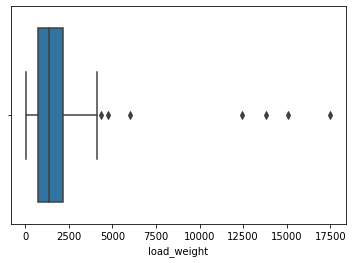

In [24]:
# Box plot
sns.boxplot(x=mrf1["load_weight"])

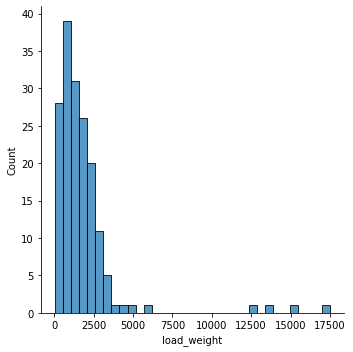

In [24]:
# Distribution plot
sns.displot(mrf1.load_weight)

From the boxplot, we can see that based on Tukey's rule, this data have outliers. Dapat terlihat juga berdasarkan distribusi data bahwa data ini memiliki kecondongan ke kanan dan sudah terlihat adanya *outlier*. Untuk memastikan lebih lanjut, digunakan Turkey Formula.

**The formula for Tukey outlier detection**

upper bound = ${q_{3}+1.5*IQR}$

lower bound = ${q_{1}-1.5*IQR}$

Langkah-langkah yang dilakukan adalah sebagai berikut

In [25]:
# Mengurutkan DataFrame
mrf1.sort_values(by=["load_weight"], inplace=True)

In [63]:
mrf1

,report_date,load_time,load_type,load_weight,dropoff_site
564,2021-01-06,2021-01-06 12:49:00 UTC,TIRES,40.0,MRF
565,2021-01-06,2021-01-06 03:30:00 UTC,TIRES,100.0,MRF
20521,2021-05-27,2021-05-27 03:14:00 UTC,TIRES,120.0,MRF
15076,2021-04-19,2021-04-19 03:03:00 UTC,TIRES,160.0,MRF
4487,2021-02-04,2021-02-04 12:31:00 UTC,TIRES,160.0,MRF
...,...,...,...,...,...
13982,2021-04-12,2021-04-12 04:30:00 UTC,TIRES,6000.0,MRF
15908,2021-04-23,2021-04-23 11:12:00 UTC,BULK,12420.0,MRF
5038,2021-02-09,2021-02-09 12:00:00 UTC,TIRES,13800.0,MRF
2230,2021-01-19,2021-01-19 08:43:00 UTC,BULK,15080.0,MRF


In [26]:
# Mencari nilai kuartil 3 (q75) dan kuartil 1 (q25)
q75,q25= np.percentile(mrf1.load_weight,[75,25])
q75,q25

(2180.0, 740.0)

In [27]:
# Mencari nilai iqr
intr_qr = q75 - q25
intr_qr

1440.0

In [28]:
# Mencari nilai lower bound dan upper bound
upper = q75 +(1.5 * intr_qr)
lower = q25 -(1.5 * intr_qr) 
upper,lower

(4340.0, -1420.0)

Diperoleh nilai lower bound adalah -1420 dan upper bound sebesar 4340. Nilai *load_weight* yang berada di luar dari kedua nilai tersebut (<-1420 atau >4340) adalah outlier. 

In [30]:
# Handling Outlier, mengosongkan nilai outlier
for x in ["load_weight"]:
    q75,q25 = np.percentile(mrf1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    upper = q75+(1.5*intr_qr)
    lower = q25-(1.5*intr_qr)
 
    mrf1.loc[mrf1[x] < lower,x] = np.nan
    mrf1.loc[mrf1[x] > upper,x] = np.nan

In [31]:
mrf1

,report_date,load_time,load_type,load_weight,dropoff_site
564,2021-01-06,2021-01-06 12:49:00 UTC,TIRES,40.0,MRF
565,2021-01-06,2021-01-06 03:30:00 UTC,TIRES,100.0,MRF
20521,2021-05-27,2021-05-27 03:14:00 UTC,TIRES,120.0,MRF
15076,2021-04-19,2021-04-19 03:03:00 UTC,TIRES,160.0,MRF
4487,2021-02-04,2021-02-04 12:31:00 UTC,TIRES,160.0,MRF
...,...,...,...,...,...
13982,2021-04-12,2021-04-12 04:30:00 UTC,TIRES,NaN,MRF
15908,2021-04-23,2021-04-23 11:12:00 UTC,BULK,NaN,MRF
5038,2021-02-09,2021-02-09 12:00:00 UTC,TIRES,NaN,MRF
2230,2021-01-19,2021-01-19 08:43:00 UTC,BULK,NaN,MRF


In [32]:
# Memeriksa nilai Skewness dan Kurtosis
skewness = "skewness: " + str (mrf1["load_weight"].skew())
kurtosis = "kurtosis: " + str (mrf1["load_weight"].kurt())
print(skewness)
print(kurtosis)

skewness: 0.5598739613810221
kurtosis: -0.3619499024708457


Data `load_weight` memiliki nilai Skewness < 0 dan kurtosis < 3 yang artinya data terdistribusi normal. Nilai null dapat diatasi dengan melakukan imputasi dengan nilai mean. Pemilihan metode penanganan outliers dengan imputasi dilakukan dengan tujuan untuk menghindari kebocoran data karena data yang bersifat time-series.

In [33]:
# change the nulls with mean
mrf1['load_weight'].fillna(mrf1['load_weight'].mean(), inplace=True)
	

In [34]:
mrf1

,report_date,load_time,load_type,load_weight,dropoff_site
564,2021-01-06,2021-01-06 12:49:00 UTC,TIRES,40.000000,MRF
565,2021-01-06,2021-01-06 03:30:00 UTC,TIRES,100.000000,MRF
20521,2021-05-27,2021-05-27 03:14:00 UTC,TIRES,120.000000,MRF
15076,2021-04-19,2021-04-19 03:03:00 UTC,TIRES,160.000000,MRF
4487,2021-02-04,2021-02-04 12:31:00 UTC,TIRES,160.000000,MRF
...,...,...,...,...,...
13982,2021-04-12,2021-04-12 04:30:00 UTC,TIRES,1419.049689,MRF
15908,2021-04-23,2021-04-23 11:12:00 UTC,BULK,1419.049689,MRF
5038,2021-02-09,2021-02-09 12:00:00 UTC,TIRES,1419.049689,MRF
2230,2021-01-19,2021-01-19 08:43:00 UTC,BULK,1419.049689,MRF


In [35]:
# Central Tendency setelah outlier dibersihkan
print ('Min: ' + str(mrf1["load_weight"].min()))
print ('Mode: ' + str(mrf1["load_weight"].mode()[0]))
print ('Median: ' + str(mrf1["load_weight"].median()))
print ('Mean: ' + str(mrf1["load_weight"].mean()))
print ('Max: ' + str(mrf1["load_weight"].max()))

Min: 40.0
Mode: 1419.0496894409937
Median: 1360.0
Mean: 1419.049689440994
Max: 4120.0


### *Range*, *Variance*, dan standar deviasi 

In [36]:
# Nilai Range, Variance, Standar Deviasi
print('Range: ' + str(max(mrf1["load_weight"]) - min(mrf1["load_weight"])))
print('Variance: ' + str(np.var(mrf1["load_weight"])))
print('Standard Deviation: ' + str(np.std(mrf1["load_weight"])))

Range: 4080.0
Variance: 724041.9023957408
Standard Deviation: 850.9065180122554


In [70]:
# Nilai Central Tendency
print ('Min: ' + str(mrf1["load_weight"].min()))
print ('Mode: ' + str(mrf1["load_weight"].mode()[0]))
print ('Median: ' + str(mrf1["load_weight"].median()))
print ('Mean: ' + str(mrf1["load_weight"].mean()))
print ('Max: ' + str(mrf1["load_weight"].max()))

Min: 40.0
Mode: 1419.0496894409937
Median: 1360.0
Mean: 1419.049689440994
Max: 4120.0


Interpretasi: Nilai varians adalah 724041.9. Semakin besar nilai varians maka semakin jauh data yang kita gunakan tersebar dari nilai rata-ratanya. Terbukti bahwa nilai rata-rata adalah sebesar 1419.05 yang nilainya lebih kecil daripada varians. Standar deviasi bertujuan untuk mengetahui berapa banyak nilai atau jumlah data yang berbeda dari rata-rata.

### *Confidence Interval*

Menggunakan keseluruhan dropoff_site (n=25109) dan menggunakan 95% Confidence Interval.

In [39]:
# Import Library
import numpy as np
import scipy.stats as st
import math

# Calculating aggregated mean, count, standard deviation
stats = awd.groupby(["dropoff_site"])["load_weight"].agg(['mean', 'median', 'count', 'std'])
print(stats)
print('-'*30)

# Calculating Confidence Interval
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, n, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)


                               mean   median  count          std
dropoff_site                                                    
AUSTIN IRON AND METAL    451.200000    400.0     50   215.649375
AUSTIN WOOD RECYCLING   4050.000000   4050.0      2  2418.305192
BALCONES RECYCLING      9464.652072   9840.0   3837  3862.243653
BALCONES WOODS          8460.000000   8460.0      1          NaN
GREAT NORTHERN         11973.142857  11300.0     70  2691.892036
HORNSBY BEND            6637.111782   6400.0   1655  3240.840371
MRF                     1799.982143   1360.0    168  2266.194104
ON ROUTE HIGH DUMP     11405.925926  11300.0     81  1419.744500
ONION CREEK            11300.000000  11300.0    813     0.000000
ORGANICS BY GOSH       11817.220851  11900.0   5755  5064.655764
PARK BEND              13385.000000  12330.0      4  5721.570297
PARK CENTER            11300.000000  11300.0     75     0.000000
ST. EDWARDS            11300.000000  11300.0      1          NaN
STEINER LANDFILL         

Beda rerata 25109 data beban muatan (load_weight) yang dikumpulkan dari 14 lokasi tempat pembuangan akhir (dropoff_site) ditunjukkan pada hasil kalkulasi di atas. Lokasi pembuangan dengan nilai paling tinggi adalah TDS landfill dengan rerata beban dari 10964 angkutan selama Januari s.d. 9 Juli 2021 adalah 15168.32 (95% CI = 15005.51 sampai 15331.13). Lokasi pembuangan dengan nilai terendah adalah Austin Iron and Metal dengan rerata beban dari 50 angkutan selama Januari s.d. 9 Juli 2021 adalah 451.20 (95% CI = 391.42 sampai 510.97). Jika pemerintah berencana menambah site baru, disarankan untuk memiliki rerata kapasitas yang melebihi 451.20 agar beban muatan bisa tertampung secara maksimal.

### Uji Hipotesis

In [57]:
# Import Library
import scipy.stats

In [63]:
# Rata-rata keseluruhan (Populasi)
print ('Mean: ' + str(mrf1["load_weight"].mean()))

Mean: 1419.049689440994


In [48]:
# Rata-rata sampel
print('Rata-rata beban muatan Juni-Juli 2021: ' + str(mrf1[(mrf1 ["report_date"] < "31/05/2021")]["load_weight"].mean()))


Rata-rata beban muatan Juni-Juli 2021: 1337.0862318840582


Untuk mengetahui apakah terdapat penurunan signifikan dapat menggunakan 
single sample one sided dan menetapkan level signifikansi sebesar 0.05. Cara ini dipilih karena hanya akan mengetes satu variabel dan membandingkan data sampel (Juni-Juli 2021) dengan data populasi (Januari-Juli 2021).

Rumusan hipotesis:

**H0: μ >= 1419**

**H1: μ < 1419**

In [64]:
# Menghitung nilai p-value dan t-hitung
t_stat,p_val = scipy.stats.ttest_1samp(mrf1.load_weight, 1419)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.4996993921046802
t-statistics: 0.0007546411723823231


<Figure size 1152x360 with 0 Axes>

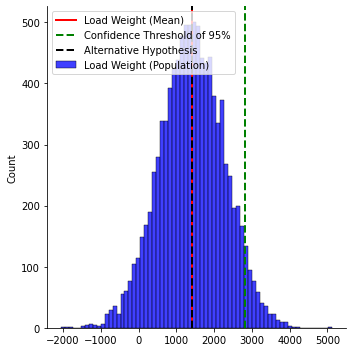

In [69]:
# Membuat grafik
lw_pop = np.random.normal(mrf1.load_weight.mean(), mrf1.load_weight.std(), 10000)

ci = scipy.stats.norm.interval(0.90, mrf1.load_weight.mean(), mrf1.load_weight.std())

plt.figure(figsize=(16,5))
sns.displot(lw_pop, label='Load Weight (Population)', color='blue')
plt.axvline(mrf1.load_weight.mean(), color='red', linewidth=2, label='Load Weight (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(lw_pop.mean() + t_stat*lw_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Nilai signifikansi yang melebihi 0.05 menjadikan kurangnya bukti untuk menolak hipotesis awal sehingga dapat dikatakan bahwa tidak terjadi penurunan beban muatan secara signifikan selama bulan Juni-Juli 2021.

### Jawab Pertanyaan

**1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!**

  Jawab: Dalam menangani outlier, dilakukan metode penggantian nilai outlier dengan nilai null dan nilai null dapat diatasi dengan melakukan imputasi dengan nilai mean. Pemilihan metode penanganan outliers dengan imputasi dilakukan dengan tujuan untuk menghindari kebocoran data karena data yang bersifat time-series.

**2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?**
  
  Jawab: Apa yang terjadi pada sampel juga terjadi pada populasi. Karena itu, karakteristik dari sampel digunakan untuk estimasi karakteristik yang sama pada populasinya. Confidence Interval adalah nilai range yang melalui nilai aktual yang terjadi pada populasi.

**3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?**
  
  Jawab: Uji hipotesis yang dilakukan menggunakan signifikansi satu ekor. Cara ini dipilih karena hanya akan mengetes satu variabel dan membandingkan data sampel (Juni-Juli 2021) dengan data populasi (Januari-Juli 2021).


## Conclusions, Assumptions, Overall Analysis

*   Terdapat 14 jenis limbah yang dikumpulkan di 18 lokasi Tempat Pembuangan Akhir di kota Austin.
*   Lokasi pembuangan dengan nilai paling tinggi adalah TDS landfill dengan rerata beban dari 10964 angkutan selama Januari s.d. 9 Juli 2021 adalah 15168.32 (95% CI = 15005.51 sampai 15331.13).  
*   Lokasi pembuangan dengan nilai terendah adalah Austin Iron and Metal dengan rerata beban dari 50 angkutan selama Januari s.d. 9 Juli 2021 adalah 451.20 (95% CI = 391.42 sampai 510.97).
*   Jika pemerintah berencana menambah site baru, disarankan untuk memiliki rerata kapasitas yang melebihi 451.20 agar beban muatan bisa tertampung secara maksimal.
*   Berdasarkan uji hipotesis, tidak terjadi penurunan beban muatan limbah yang diangkut selama bulan Juni-Juli 2021



